In [ ]:
# thomas for medical video processing
# 2019-02-25
# This should be running in Python 2.7

In [1]:
import sys
# sys.path.append("/usr/local/lib/python2.7/dist-packages")
sys.executable
# print(sys.path)

'/usr/bin/python3'

In [4]:
#########################################
# Step 1: get each frame of the video
# Todo: Change the name of target video path : 20190306120335
# path_video = /home/bibo/Data/Vessel/videos/20190306120335.avi   # input video
# path_local_oriimgs = /home/bibo/Data/Vessel/20190306120335/images/  # output frames
# path_local_orimasks = /home/bibo/Data/Vessel/20190306120335/masks/  # output frames
#
#########################################
from matplotlib import pyplot as plt
import matplotlib
import os
%matplotlib inline
from shutil import copyfile 
import ConfigParser
import cv2
from moviepy.editor import VideoFileClip
from scipy.misc import imsave

config = ConfigParser.RawConfigParser()
config.readfp(open(r'./retina-unet/configuration.txt'))
path_video = config.get('recognition settings', 'path_video')
saveimgroot = config.get('recognition settings', 'path_local_oriimgs')
savemaskroot = config.get('recognition settings', 'path_local_orimasks')
standardmask = config.get('recognition settings', 'path_standardmask')

image_height = int(config.get('recognition settings', 'image_height')) # 584
image_width = int(config.get('recognition settings', 'image_width'))   # 565

if not os.path.exists(saveimgroot):
    os.makedirs(saveimgroot)
if not os.path.exists(savemaskroot):
    os.makedirs(savemaskroot)

clip = VideoFileClip(path_video) 
count =1
for frames in clip.iter_frames():
#     backtorgb = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
#     gray_frames = cv2.cvtColor(frames, cv2.COLOR_RGB2GRAY)
    frames_new = cv2.resize(frames,(image_width,image_height))
    imsave(saveimgroot + str(count)+'.tif', frames_new)
    dstmask = savemaskroot + str(count) + '.tif'
    copyfile(standardmask, dstmask) # save masks
#     print frames.shape
#     print gray_frames.shape
    count+=1
print('full_images_to_recog = '+str(count-1));

ImportError: No module named 'ConfigParser'

In [11]:
#########################################
# Step 2: Preprossing, images to hdf5 file
#
#
#
#
#
#
#
#########################################
%run ./retina-unet/run_prepare_recog.py  # 20　iterations, total is 495

SyntaxError: Missing parentheses in call to 'print' (run_prepare_recog.py, line 41)

In [26]:
from PIL import Image
img = Image.open('/home/bibo/Data/Vessel/datasets_recognition/20190215085036/1.tif')
print(np.asarray(img).shape)

(584, 565)


In [26]:
#########################################
# Step 3: Image Recognition, change the Imgs_to_test_from and Imgs_to_test_to in configuration.txt
#########################################
%run ./retina-unet/run_recognition.py


1. Create directory for the results (if not already existing)

2. Run the prediction on GPU (no nohup)


In [4]:
#########################################
# Step 2+3 iteratively recognition, fast
#########################################
import ConfigParser
config = ConfigParser.RawConfigParser()
config.read(r'./retina-unet/configuration.txt')
# n_from = int(config.get('recognition settings', 'Imgs_to_test_from'))
# print(n_from)

samples = 493
patches = 20
for i in range(samples/patches+1):
    idfrom = i*20
    idto = min((i+1)*20,samples)
    print('in '+ str(i))
    config.set('recognition settings', 'Imgs_to_test_from', str(idfrom))
    config.set('recognition settings', 'Imgs_to_test_to', str(idto))
    with open(r'./retina-unet/configuration.txt', 'wb') as configfile:
        config.write(configfile)
    %run ./retina-unet/run_prepare_recog.py  #  step 2
    %run ./retina-unet/run_recognition.py    # step 3
#     break

in 0
saving test datasets
original image: 11.tif
border masks name: 11.tif
original image: 1.tif
border masks name: 1.tif
original image: 9.tif
border masks name: 9.tif
original image: 13.tif
border masks name: 13.tif
original image: 6.tif
border masks name: 6.tif
original image: 14.tif
border masks name: 14.tif
original image: 16.tif
border masks name: 16.tif
original image: 20.tif
border masks name: 20.tif
original image: 2.tif
border masks name: 2.tif
original image: 17.tif
border masks name: 17.tif
original image: 18.tif
border masks name: 18.tif
original image: 10.tif
border masks name: 10.tif
original image: 12.tif
border masks name: 12.tif
original image: 19.tif
border masks name: 19.tif
original image: 4.tif
border masks name: 4.tif
original image: 8.tif
border masks name: 8.tif
original image: 7.tif
border masks name: 7.tif
original image: 15.tif
border masks name: 15.tif
original image: 3.tif
border masks name: 3.tif
original image: 5.tif
border masks name: 5.tif
imgs max: 25


1. Create directory for the results (if not already existing)

2. Run the prediction on GPU (no nohup)
in 7
saving test datasets
original image: 153.tif
border masks name: 153.tif
original image: 152.tif
border masks name: 152.tif
original image: 145.tif
border masks name: 145.tif
original image: 147.tif
border masks name: 147.tif
original image: 156.tif
border masks name: 156.tif
original image: 159.tif
border masks name: 159.tif
original image: 154.tif
border masks name: 154.tif
original image: 141.tif
border masks name: 141.tif
original image: 143.tif
border masks name: 143.tif
original image: 149.tif
border masks name: 149.tif
original image: 155.tif
border masks name: 155.tif
original image: 144.tif
border masks name: 144.tif
original image: 160.tif
border masks name: 160.tif
original image: 146.tif
border masks name: 146.tif
original image: 148.tif
border masks name: 148.tif
original image: 158.tif
border masks name: 158.tif
original image: 150.tif
border masks name: 150.tif
ori

border masks name: 270.tif
original image: 267.tif
border masks name: 267.tif
original image: 266.tif
border masks name: 266.tif
original image: 278.tif
border masks name: 278.tif
original image: 275.tif
border masks name: 275.tif
original image: 269.tif
border masks name: 269.tif
original image: 262.tif
border masks name: 262.tif
imgs max: 255.0
imgs min: 0.0
border masks are correctly withih pixel value range 0-255 (black-white)

1. Create directory for the results (if not already existing)

2. Run the prediction on GPU (no nohup)
in 14
saving test datasets
original image: 294.tif
border masks name: 294.tif
original image: 299.tif
border masks name: 299.tif
original image: 298.tif
border masks name: 298.tif
original image: 288.tif
border masks name: 288.tif
original image: 296.tif
border masks name: 296.tif
original image: 293.tif
border masks name: 293.tif
original image: 284.tif
border masks name: 284.tif
original image: 292.tif
border masks name: 292.tif
original image: 297.tif
bo

original image: 417.tif
border masks name: 417.tif
original image: 402.tif
border masks name: 402.tif
original image: 406.tif
border masks name: 406.tif
original image: 419.tif
border masks name: 419.tif
original image: 415.tif
border masks name: 415.tif
original image: 404.tif
border masks name: 404.tif
original image: 411.tif
border masks name: 411.tif
original image: 410.tif
border masks name: 410.tif
original image: 405.tif
border masks name: 405.tif
original image: 414.tif
border masks name: 414.tif
original image: 403.tif
border masks name: 403.tif
original image: 416.tif
border masks name: 416.tif
original image: 420.tif
border masks name: 420.tif
original image: 407.tif
border masks name: 407.tif
original image: 418.tif
border masks name: 418.tif
imgs max: 255.0
imgs min: 0.0
border masks are correctly withih pixel value range 0-255 (black-white)

1. Create directory for the results (if not already existing)

2. Run the prediction on GPU (no nohup)
in 21
saving test datasets
or

In [50]:
#########################################
# Step 4  interate images into videos
#########################################
import cv2
import os
import os.path

rootpath = '/home/bibo/Data/Vessel/datasets_recognition/'
imgspath = '20190215085036'
video_name = rootpath + 'generated_'+imgspath +'.mp4' 

filesnumber = len(os.listdir(rootpath+imgspath))
img_list = []
count = 0
for i in range(filesnumber):
    filename = rootpath+imgspath+'/'+str(i+1)+'.tif'
    gray = cv2.imread(filename,0)
    color = cv2.cvtColor(gray,cv2.COLOR_GRAY2RGB)
    antinoise = cv2.fastNlMeansDenoisingColored(color, None, 10, 10, 7,21)
    print('f_'+str(i)),
#     print(colorframe.shape)
    img_list.append(np.array(antinoise))
    
#     print(filename)
# print(len(img_list))
clip = ImageSequenceClip(img_list, fps=25)
clip.write_videofile(video_name)


t:   0%|          | 0/495 [00:00<?, ?it/s, now=None]

Moviepy - Building video /home/bibo/Data/Vessel/datasets_recognition/generated_20190215085036.mp4.
Moviepy - Writing video /home/bibo/Data/Vessel/datasets_recognition/generated_20190215085036.mp4




t:  99%|█████████▉| 489/495 [00:02<00:00, 198.66it/s, now=None]
                                                               

Moviepy - Done !
Moviepy - video ready /home/bibo/Data/Vessel/datasets_recognition/generated_20190215085036.mp4


In [2]:
from vidstab import VidStab

input_video = 'cut.avi'
# Using defaults
stabilizer = VidStab()
stabilizer.stabilize(input_path=input_video, output_path='cut_stable_video_1.avi')


finish_48


In [ ]:
# Histogram Equalization

In [ ]:
#Image enhancement
# https://github.com/kentsyx/Neural-IMage-Assessment
# save in refine_cut_images, not good
# python main.py --use_gpu=0 --phase=test --test_dir=C:/Users/Zhang/Desktop/oneDrive/Jupyter/Vessel/cut_images/ --save_dir=C:/Users/Zhang/Desktop/oneDrive/Jupyter/Vessel/refine_cut_images/ --decom=0  

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk
img = cv.imread('cut_images/cut_1.jpg', cv.IMREAD_GRAYSCALE)

def band_pass(img, high, low):
    fq = np.fft.fft2(img)
    f_low = ndimage.fourier_ellipsoid(fq, size=low)
    f_high = ndimage.fourier_ellipsoid(fq, size=high)
    recon = np.fft.ifft2(f_high - f_low)
    plt.imshow(recon.real, cmap='gray')
    return recon.real
def claclahe(img, limit, size):
    clahe = cv.createCLAHE(clipLimit=limit, tileGridSize=size)
    cl = clahe.apply(normalize(img, k=255).astype(np.uint8))
    plt.imshow(cl, cmap='gray')
    return cl
def histeq(img):
    ret = cv.equalizeHist(normalize(img, k=255).astype(np.uint8))
    show(ret)
    return ret
def canny(img, low, high, size):
    ret = cv.Canny(normalize(img, k=255).astype(np.uint8), low, high, size)
    show(ret)
    return ret
def normalize(img, k=1):
    mi = np.min(img)
    ma = np.max(img - mi)
    return (img - mi) * k/ (ma - mi)

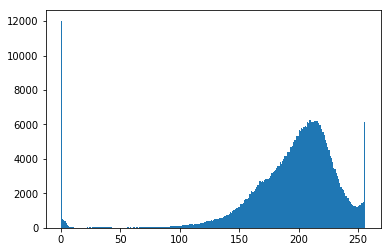

In [2]:
# img = cv2.imread('home.jpg',0)
plt.hist(img.ravel(),256,[0,256]); 
plt.show()

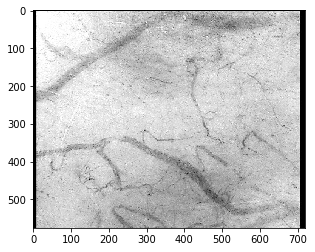

In [3]:
plt.imshow(img, cmap='gray')

In [8]:
# plt.imshow(img, cmap='gray')
# img = cv.Canny(img, 60, 250, (5, 5))
# plt.imshow(cv.blur(img, (3, 3)), cmap='gray')
imgh = cv.equalizeHist(img)
imgb = band_pass(imgh,30, 50)
# img = claclahe(img, 4, (10, 10))
# cl_can = cv.Canny(cl, 40, 60, (5, 5))


plt.imshow(imgb, cmap='gray')


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:3334: error: (-215:Assertion failed) _src.type() == CV_8UC1 in function 'cv::equalizeHist'


In [ ]:
# video cuting 
# https://github.com/Zulko/moviepy
# pip install moviepy
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip

# cut videos
# start_time = 0
# end_time  = 2
# ffmpeg_extract_subclip("20190215085036.avi", start_time, end_time, targetname="cut.avi")



#     break
# new_clip = ImageSequenceClip(new_frames, fps=clip.fps)
# new_clip.write_videofile("new_file.mp4") 


# frames = int(myclip.fps * myclip.duration)
# print(myclip.fps)
# print(frames)
# for f in range(frames):
#     myclip.save_frame("frame.jpeg", t='01:00:00')
# Now cut the clip between t=0 and 2 secs. This conserves the fps.
# myclip2 = myclip.subclip(0, 2)
# myclip.write_videofile("0_2.mp4")
# myclip2.write_gif("test.gif") # the gif will have 30 fps
# myclip.save_frame("frame.jpeg", t='01:00:00')